# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#Keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError as RMSE

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")


%matplotlib inline

# Carregando os dados

In [2]:
df_houses = pd.read_csv('/mnt/data/data.csv', sep=';')

In [3]:
df_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Análise exploratória

Primeiro vamos tentar entender sobre os tipos de dados que estamos lidando e a sua distribuição

In [4]:
df_houses.info()
df_houses.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


## Avaliação da variável alvo

### SalePrice

Vamos avaliar a distribuição da varíavel preços:

In [5]:
df_houses['SalePrice'].describe()

count      2919.000000
mean     180052.602261
std       57381.570984
min       34900.000000
25%      154794.500000
50%      176734.000000
75%      191895.000000
max      755000.000000
Name: SalePrice, dtype: float64

Parece que a princípio não temos problemas com preços problemáticos aqui, como preços negativos ou zerados

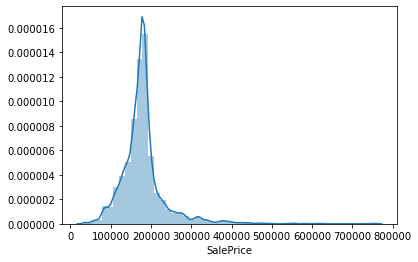

In [6]:
sns.distplot(df_houses['SalePrice']);

Com o histograma conseguimos notar que não se trata de uma distribuição normal, assimetria positiva, e um pico bem acentuado.

### Como SalePrice se relaciona com o ano de construção?

Vamos verificar uma variável categórica que beseado no senso comum de grande importância para determinar o preço de uma casa: Ano de construção. Será que isto se verifica?

**INFO**: YearBuilt: Original construction date

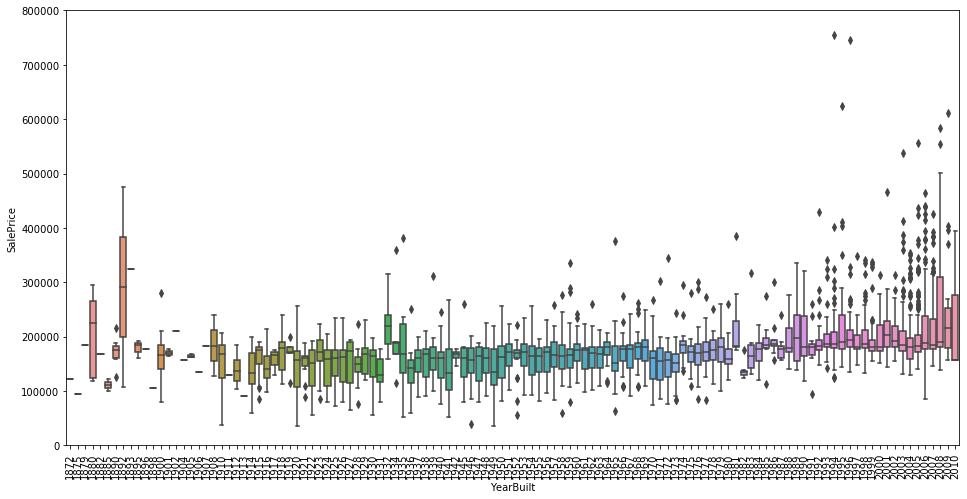

In [7]:
var = 'YearBuilt'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Conseguimos perceber pelo gráfico que existe uma tendência a casas mais novas serem mais caras.

### Como SalePrice se relaciona com OverallQual?

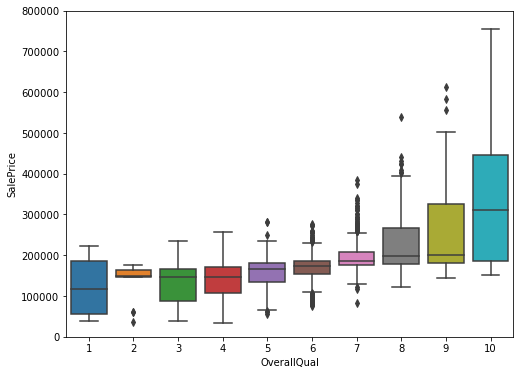

In [8]:
data = pd.concat([df_houses['SalePrice'], df_houses['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_houses['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## Correlação geral

Vamos visualização a matriz de correlação para identificar variáveis importantes para o nosso modelo entendendo quais são as que mais estão correlacionadas ao preço de uma casa.

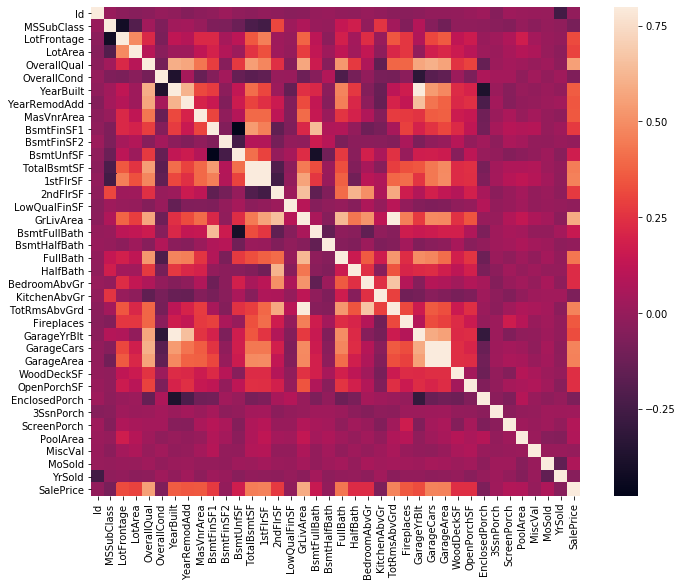

In [9]:
corrmat = df_houses.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Aqui a leitura a ser feita é na escala de cores, quanto mais vermelho-laranja possivelmente melhor é a variável para a construção do nosso modelo.

As variáveis 'TotalBsmtSF' and '1stFlrSF' parece muito correlacionadas, então são possíveis variáveis para excluirmos, não há necessidade das duas. Já as variáveis 'GarageYrBuilt' e 'GarageCars', 'TotRmsAbvGrs' com 'GrLivArea' também apresentam comportamento semelhante.'GarageYrBlt' com 'YrBuilt' muito correlacionadas podendo indicar que a maioria das garagens foi construída no mesmo ano da casa.

Outro ponto importante para verificarmos são as variáveis muito correlacionadas com o que queremos "prever", ou seja, a variável 'SalePrice'.


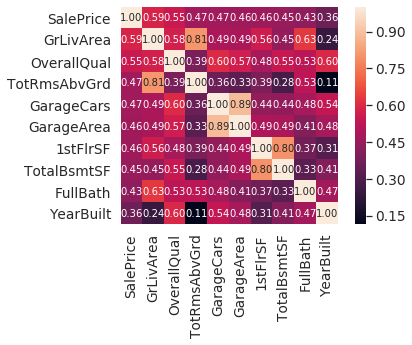

In [10]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_houses[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Aqui fizemos um plot com as 10 variáveis mais correlacionadas com SalePrice. 

Algumas variáveis se provaram boas correlações como GrLivArea, YearBuilt e TotalBsmtSF.

TotalBsmtSF e TotRmsAbvGrd apareceram aqui mas são muito correlacionadas, a presença das duas pode influenciar negativamente no nosso modelo.

TotalBsmtSF e 1stFlrSF aparecem com uma correlação de 0.8 entre si, escolheremos apenas um para manter.

Garage Cars e GarageArea são muito correlacionadas então é recomendado que tenhamos uma outra variável que não ela ou simplesmente retiramos uma delas do nosso treinamento.


Vamos reavaliar em formato de scatterplot

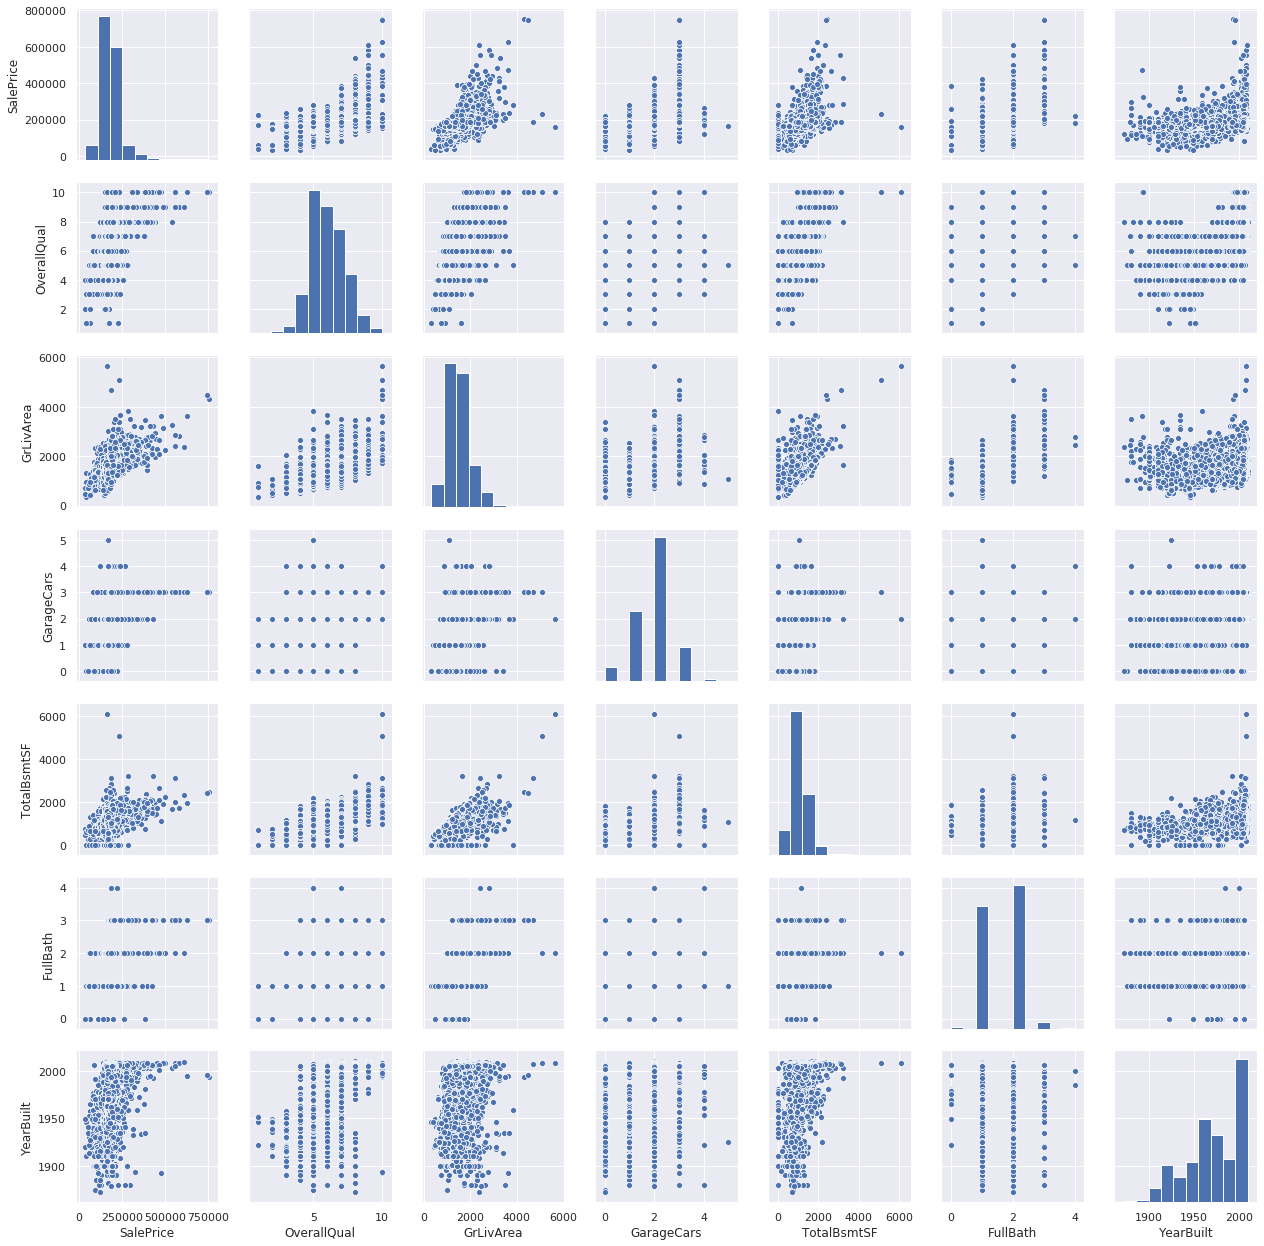

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_houses[cols], size = 2.5)
plt.show();

Aqui conseguimos notar algumas formações que podem indicar uma relação linear como entre TotalBsmtSF e GrLivArea, além de relações que já verificamos anteriormente como SalePrice x YearBuilt e SalePrice e TotalBsmtSF.

# Limpando o dataset

## Dados faltantes

Verificando a quantidade de nulos e dados faltantes em colunas do dataset

In [12]:
total = df_houses.isnull().sum().sort_values(ascending=False)
percent = (df_houses.isnull().sum()/df_houses.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Vamos definir o ponto de corte em que deletaremos a observação.

Para colunas com pelo 23 itens faltante vamos deletar a coluna. Não parecem variáveis de importância olhando sua descrição.

In [13]:
df_houses = df_houses.drop((missing_data[missing_data['Total'] > 4]).index,1)

Para colunas com 4 ou menos observações faltantes iremos deletar essas linhas com dados faltantes.

In [14]:
missing_data[missing_data['Total'] < 5][missing_data['Total'] != 0]

,Total,Percent
MSZoning,4,0.001370
Utilities,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFullBath,2,0.000685
Functional,2,0.000685
Exterior1st,1,0.000343
TotalBsmtSF,1,0.000343
BsmtUnfSF,1,0.000343
BsmtFinSF2,1,0.000343
GarageArea,1,0.000343


In [15]:
columns_with_null = missing_data[missing_data['Total'] < 5][missing_data['Total'] != 0].index.tolist()

In [16]:
for column in columns_with_null:
    df_houses = df_houses.drop(df_houses.loc[df_houses[column].isnull()].index)

In [17]:
df_houses.shape[0]

2906

In [18]:
len(df_houses.columns)

63

## Outliers

Depois de limpar os dados com problema de nulos temos que trabalhar no sentido de evitar outliers do nosso dataset que podem influenciar o resultado.
Precisamos definir o limite que separa um dado normal de um outlier. Vamos normalizar os dados para atingir esse objetivo.

In [19]:
saleprice_scaled = StandardScaler().fit_transform(df_houses['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.52619726]
 [-2.51904006]
 [-2.47395494]
 [-2.44957518]
 [-2.43738531]
 [-2.228416  ]
 [-2.21970895]
 [-2.17617368]
 [-2.17617368]
 [-2.15888147]]

outer range (high) of the distribution:
[[ 5.31189305]
 [ 5.6050944 ]
 [ 6.23484081]
 [ 6.53088065]
 [ 6.55841236]
 [ 7.01730895]
 [ 7.51751181]
 [ 7.74986826]
 [ 9.8395613 ]
 [10.01370239]]


A variação dos valores menores parece ser baixa olhando a distribuição.

Já nos valores mais altos existe uma variação clara, principalmente os valores acima de 8.

Vamos olhar para variáveis importantes e sua relação com SalePrice para identificar possíveis pontos problemáticos que devem ser removidos.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


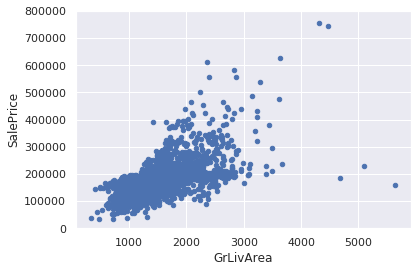

In [20]:
var = 'GrLivArea'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [21]:
df_houses = df_houses.drop(df_houses[df_houses['GrLivArea'] > 4000].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


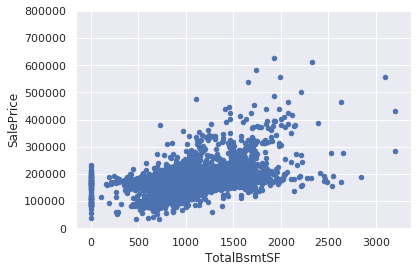

In [22]:
var = 'TotalBsmtSF'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [23]:
df_houses = df_houses.drop(df_houses[df_houses['TotalBsmtSF'] > 2500].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


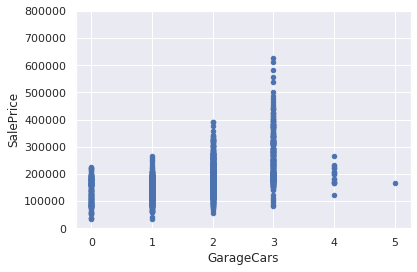

In [24]:
var = 'GarageCars'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [25]:
df_houses = df_houses.drop(df_houses[df_houses['GarageCars'] > 5].index)

Verificando o SalePrice novamente para tentarmos melhorar a distribuição e balancear o dataset

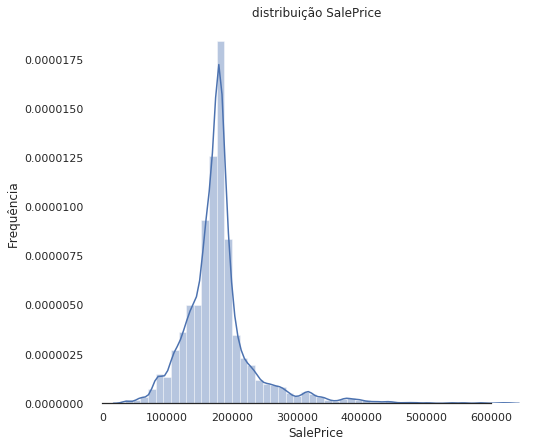

In [26]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(df_houses['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequência")
ax.set(xlabel="SalePrice")
ax.set(title="distribuição SalePrice")
sns.despine(trim=True, left=True)
plt.show()

Precisamos ajustar a distribuição acima, vamos testar transformações no SalePrice, para facilitar o trabalho dos modelos

Aplicando uma transformada de log(1+x)

In [27]:
df_houses["SalePrice"] = np.log1p(df_houses["SalePrice"])

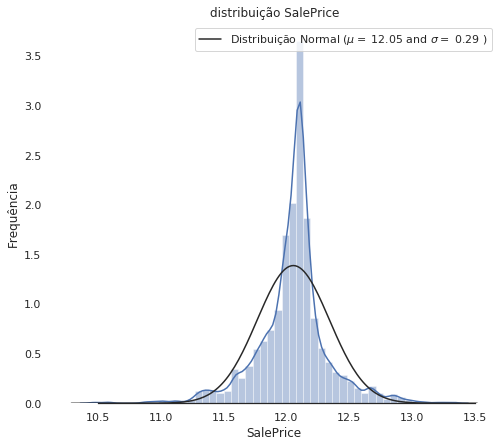

In [28]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(df_houses['SalePrice'] , fit=norm, color="b");


(mu, sigma) = norm.fit(df_houses['SalePrice'])


plt.legend(['Distribuição Normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequência")
ax.set(xlabel="SalePrice")
ax.set(title="distribuição SalePrice")
sns.despine(trim=True, left=True)

plt.show()

Pico da distribuição continua muito alto, vamos acertar o sampling dos dados para ajeitar a representatividade

In [29]:
df_houses

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,12.026240
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,12.012421
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,12.297845
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,12.127706


Dividindo em seções dos valores disponíveis:

In [30]:
df_houses['bins'] = pd.cut(df_houses['SalePrice'], np.arange(10.460271,13.345509,0.1), retbins=False)

In [31]:
df_houses.groupby(['bins']).Id.agg(['count'])

,count
bins,
"(10.46, 10.56]",2
"(10.56, 10.66]",2
"(10.66, 10.76]",0
"(10.76, 10.86]",1
"(10.86, 10.96]",4
"(10.96, 11.06]",6
"(11.06, 11.16]",6
"(11.16, 11.26]",6
"(11.26, 11.36]",35


In [32]:
df_houses[(df_houses['SalePrice'] > 11.96) & (df_houses['SalePrice'] < 12.06)].sample(frac=0.5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,bins
2441,2442,30,RM,3153,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2007,WD,Normal,11.960223,"(11.86, 11.96]"
2368,2369,120,FV,5330,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2007,New,Partial,11.987251,"(11.96, 12.06]"
33,34,20,RL,10552,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,12.016733,"(11.96, 12.06]"
561,562,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,4,2006,WD,Normal,12.043560,"(11.96, 12.06]"
659,660,20,RL,9937,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,3,2009,WD,Normal,12.025755,"(11.96, 12.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2308,120,RL,4590,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2007,CWD,Normal,11.964167,"(11.96, 12.06]"
2497,2498,20,RL,5400,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.054645,"(11.96, 12.06]"
2117,2118,50,RM,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2008,WD,Normal,11.969077,"(11.96, 12.06]"
1891,1892,20,RL,6410,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,0,0,0,3,2009,WD,Normal,12.042842,"(11.96, 12.06]"


Acertando o número de observações para os intervalos com número muito maior de dados.

In [33]:
df_filtered = df_houses.drop(df_houses[(df_houses['SalePrice'] > 11.96) & (df_houses['SalePrice'] < 12.06)].sample(frac=0.5).index)
df_filtered = df_filtered.drop(df_filtered[(df_filtered['SalePrice'] > 12.06) & (df_filtered['SalePrice'] < 12.16)].sample(frac=0.6).index)

In [34]:
df_filtered.groupby(['bins']).Id.agg(['count'])

,count
bins,
"(10.46, 10.56]",2
"(10.56, 10.66]",2
"(10.66, 10.76]",0
"(10.76, 10.86]",1
"(10.86, 10.96]",4
"(10.96, 11.06]",6
"(11.06, 11.16]",6
"(11.16, 11.26]",6
"(11.26, 11.36]",35


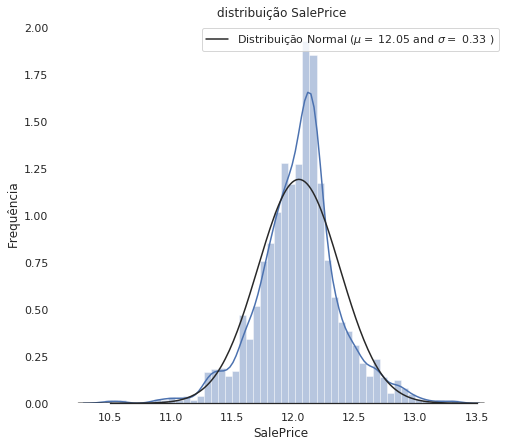

In [35]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(df_filtered['SalePrice'] , fit=norm, color="b");


(mu, sigma) = norm.fit(df_filtered['SalePrice'])


plt.legend(['Distribuição Normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequência")
ax.set(xlabel="SalePrice")
ax.set(title="distribuição SalePrice")
sns.despine(trim=True, left=True)

plt.show()

In [36]:
df_filtered['SalePrice'].describe()

count    2111.000000
mean       12.046689
std         0.334745
min        10.460271
25%        11.860712
50%        12.072547
75%        12.206955
max        13.345509
Name: SalePrice, dtype: float64

In [37]:
df_filtered.shape[0]

2111

# Treinamento dos modelos

In [38]:
df_filtered.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'bins'],
      dtype='object')

In [39]:
df_train = pd.get_dummies(df_filtered)

In [40]:
y = df_train.SalePrice
X = df_train.drop(['SalePrice', 'Id'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, random_state=8)

## cross-validation

Definindo validação cruzada para evitar overfitting

In [41]:
kf = KFold(n_splits=5, random_state=8, shuffle=True)

## Métricas de erro

Como temos uma variável alvo de predição vamos utilizar métricas de acordo. No caso selecionamos O Root mean Square error, cujo valor desejamos minimizar.

In [42]:
def root_mean_squared_error_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.math.squared_difference(y_true, y_pred)))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_X, y=train_y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

## Modelos Regressores

Conjunto de regressores que vamos avaliar:

In [43]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

### Scores de cross-validation

In [44]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

In [45]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[22:06:33] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:04] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:36] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:07] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:38] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
xgboost: 0.1655 (0.0109)


In [46]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.2199 (0.0212)


In [47]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.0847 (0.0316)


In [48]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1190 (0.0059)


In [49]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1511 (0.0322)


### Fitando modelos

In [50]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(train_X), np.array(train_y))

stack_gen
[22:13:15] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:46] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:17] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:54] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:30] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warn

In [51]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(train_X, train_y)

lightgbm


In [52]:
print('xgboost')
xgb_model_full_data = xgboost.fit(train_X, train_y)

xgboost
[22:24:19] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
print('Svr')
svr_model_full_data = svr.fit(train_X, train_y)

Svr


In [54]:
print('Ridge')
ridge_model_full_data = ridge.fit(train_X, train_y)

Ridge


In [55]:
print('RandomForest')
rf_model_full_data = rf.fit(train_X, train_y)

RandomForest


In [56]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(train_X, train_y)

GradientBoosting


É possível misturar os resultados dos modelos para termos um resultado final mais robusto em relação a dados diferentes. Os coeficientes podem ser alterados/definidos de forma empírica.

In [57]:
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [58]:
blended_predictions(train_X)

array([12.04525279, 12.13041523, 12.22858242, ..., 11.9457949 ,
       12.08989991, 11.47992358])

In [59]:
blended_score = rmsle(train_y, blended_predictions(train_X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07193714420448068


Comparação entre o valor de RMSLE dos modelos:

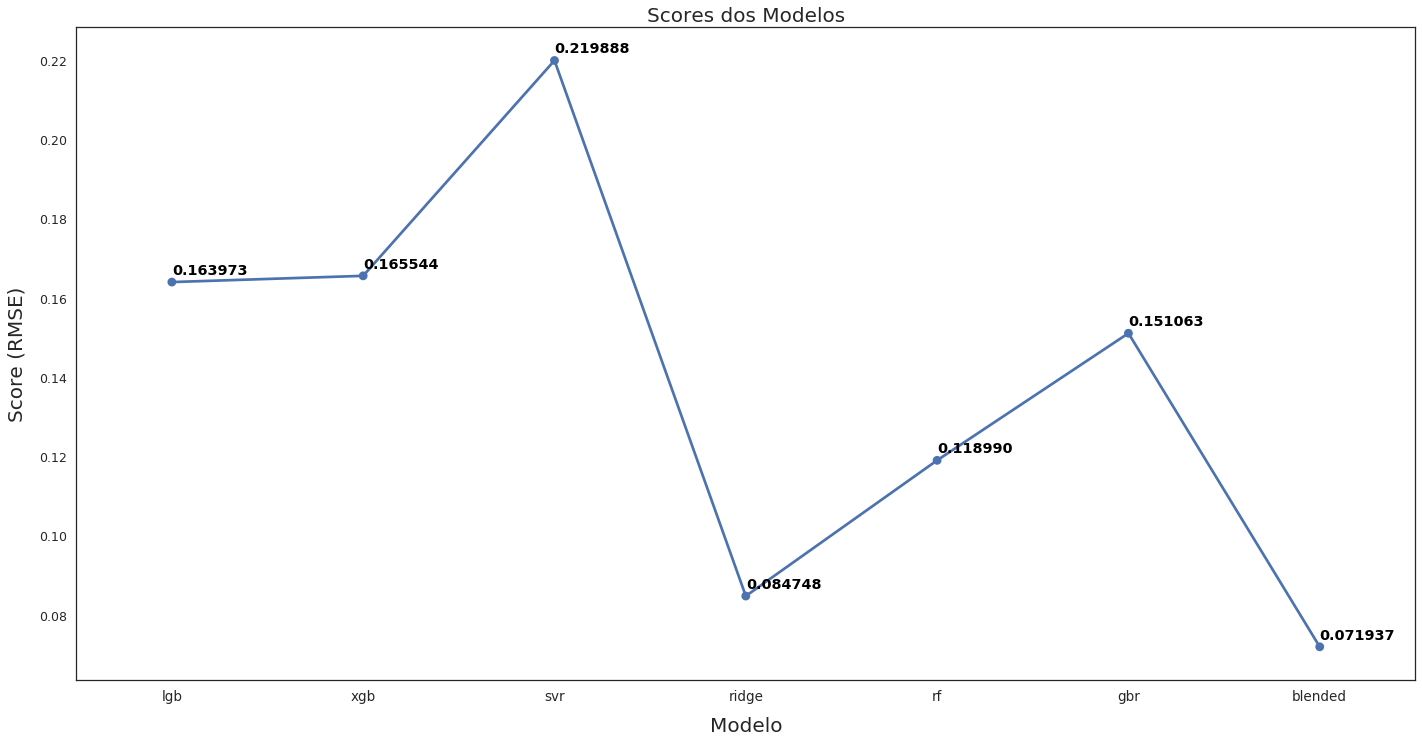

In [60]:
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Modelo', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores dos Modelos', size=20)

plt.show()

Para obtermos o valor "real" devemos fazer a tranformada inversa que realizamos na distribuição:

In [61]:
compare_df = pd.DataFrame(train_y, columns=['y_train'])
compare_df['y_predicted'] = blended_predictions(train_X) 
compare_df['y_train'] = compare_df['y_train'].apply(np.expm1)
compare_df['y_predicted'] = compare_df['y_predicted'].apply(np.expm1)
compare_df['diff'] = compare_df.apply(lambda x: x['y_predicted'] - x['y_train'], axis=1)
compare_df

,y_train,y_predicted,diff
0,174444.0,170288.087586,-4155.912414
1,186348.0,185425.754598,-922.245402
2,208353.0,204552.005494,-3800.994506
3,193500.0,198379.310917,4879.310917
4,176129.0,176824.371114,695.371114
...,...,...,...
1578,164279.0,181699.945049,17420.945049
1579,140000.0,137236.501248,-2763.498752
1580,163784.0,154166.491922,-9617.508078
1581,180370.0,178063.283283,-2306.716717


Visualização mais concreta do modelo em comparação com os valores originais:

<Figure size 432x288 with 0 Axes>

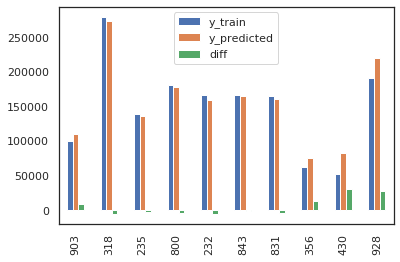

In [62]:
fig = plt.figure()
compare_df.sample(10).plot(kind='bar', legend=True)

### Conjunto de teste

In [63]:
compare_df2 = pd.DataFrame(test_y, columns=['y_test'])
compare_df2['y_predicted'] = blended_predictions(test_X) 
compare_df2['y_test'] = compare_df2['y_test'].apply(np.expm1)
compare_df2['y_predicted'] = compare_df2['y_predicted'].apply(np.expm1)
compare_df2['diff'] = compare_df2.apply(lambda x: x['y_predicted'] - x['y_test'], axis=1)
compare_df2

,y_test,y_predicted,diff
0,198342.0,204531.300612,6189.300612
1,155000.0,159092.661183,4092.661183
2,94000.0,90731.910578,-3268.089422
3,174126.0,161811.805535,-12314.194465
4,139000.0,144024.523369,5024.523369
...,...,...,...
523,175758.0,170009.507554,-5748.492446
524,264132.0,262152.462535,-1979.537465
525,170996.0,158390.715154,-12605.284846
526,111250.0,116034.818083,4784.818083


<Figure size 432x288 with 0 Axes>

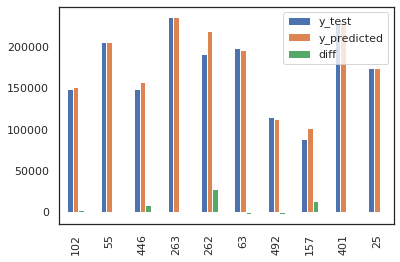

In [64]:
fig = plt.figure()
compare_df2.sample(10).plot(kind='bar', legend=True)

## Rede neural com Keras

Vamos testar um modelo de rede neural com 5 layers intermediários de densidade 200, 100, 50, 25 e 12 com a função de ativação relu.

In [65]:
y = df_train.SalePrice
X = df_train.drop(['SalePrice', 'Id'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, random_state=8)

In [66]:
seed = 8
np.random.seed(seed)
input_dim = len(train_X[0])
# Model
model = Sequential()
model.add(Dense(200, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss=root_mean_squared_error_loss, optimizer=keras.optimizers.Adadelta())

# feature_cols = test_X
# labels = train_y.values

model.fit(np.array(train_X), np.array(train_y), epochs=100, batch_size=10)

Epoch 1/100
159/159 [==============================] - 21s 3ms/step - loss: 10.4594
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 8.6514
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 6.9452
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 5.8422
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 5.2221
Epoch 6/100
159/159 [==============================] - 0s 3ms/step - loss: 5.0983A: 0s - loss: 5.21
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 4.3806
Epoch 8/100
159/159 [==============================] - 0s 2ms/step - loss: 3.8850
Epoch 9/100
159/159 [==============================] - 0s 2ms/step - loss: 4.4855
Epoch 10/100
159/159 [==============================] - 0s 2ms/step - loss: 3.5643
Epoch 11/100
159/159 [==============================] - 0s 2ms/step - loss: 3.5644
Epoch 12/100
159/159 [==============================] - 0s 2ms/step - loss: 

159/159 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 100/100
159/159 [==============================] - 0s 2ms/step - loss: 0.3281


In [67]:
model.evaluate(np.array(train_X), np.array(train_y))

50/50 [==============================] - 1s 2ms/step - loss: 0.3762


0.3762495815753937

### Conjunto de teste

In [68]:
compare_df2['y_predicted_keras'] = model.predict(np.array(test_X))
compare_df2['y_predicted_keras'] = compare_df2['y_predicted_keras'].apply(np.expm1)

<Figure size 432x288 with 0 Axes>

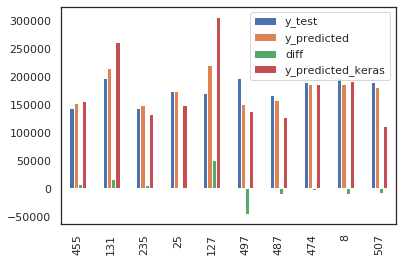

In [69]:
fig = plt.figure()
compare_df2.sample(10).plot(kind='bar', legend=True)

# Conclusão

O approach de fazer uma média ponderada dos modelos rendeu um ganho bom nos resultados, reduzindo significantemente o RMSE. O resultado com Keras talvez necessite de mais ajustes prévios no pré-processamento dos dados ou uma mudança na rede. Os resultados com os regressores foram bem satisfatórios com o pré-processamento atual e o resampling dos dados.

Robustez ganha com o uso de vários regressores também é importante. Outro ponto crucial foi o resampling da base para que o modelo conseguisse enxergar melhor a distribuição de dados e não ocorrer um enviesamento da predição.


Resultado dos regressores em conjunto:
RMSE = 0.07193